In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('events.csv')

In [ ]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1.515916e+18,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1.515916e+18,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1.515916e+18,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1.515916e+18,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1.515916e+18,aa4mmk0kwQ


In [ ]:
totaldatashape=data.shape[0]
totaldatashape

660645

In [ ]:
# Check for missing values
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,182069
brand,160513
price,1
user_id,1
user_session,150


In [ ]:
data.dtypes

,0
event_time,object
event_type,object
product_id,int64
category_id,int64
category_code,object
brand,object
price,float64
user_id,float64
user_session,object


In [ ]:
# Convert `event_time` column to datetime
data['event_time'] = pd.to_datetime(data['event_time'])

In [ ]:
data.dtypes

,0
event_time,"datetime64[ns, UTC]"
event_type,object
product_id,int64
category_id,int64
category_code,object
brand,object
price,float64
user_id,float64
user_session,object


In [ ]:
data[data['category_code'] == "computers.peripherals.printer"].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1.515916e+18,aGFYrNgC08
13,2020-09-24 12:00:00+00:00,view,1080093,2144415923107266682,computers.peripherals.printer,ricoh,268.17,1.515916e+18,63xjTFC54g
43,2020-09-24 12:03:37+00:00,view,4101820,2144415933727244688,computers.peripherals.printer,ricoh,107.05,1.515916e+18,DQ79YJiIcZ
72,2020-09-24 12:12:24+00:00,view,1355041,2144415934608048556,computers.peripherals.printer,hp,11.22,1.515916e+18,XRpGJqnr1m
78,2020-09-24 12:14:07+00:00,view,1400817,2144415923107266682,computers.peripherals.printer,hp,494.94,1.515916e+18,GHliqixrsL


In [ ]:
# that much product in data

data['product_id'].nunique()

49196

In [ ]:
# type of category code

data['category_code'].nunique()

108

In [ ]:
data.duplicated().sum()

506

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
firstcleanshape=data.shape[0]
firstcleanshape

660139

# working on nan values

In [ ]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1.515916e+18,LJuJVLEjPT
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1.515916e+18,tdicluNnRY
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1.515916e+18,4TMArHtXQy
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1.515916e+18,aGFYrNgC08
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1.515916e+18,aa4mmk0kwQ


In [ ]:
data.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,181931
brand,160417
price,1
user_id,1
user_session,147


user_session

In [ ]:
data = data.dropna(subset=['user_session'])

In [ ]:
data.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,181887
brand,160384
price,0
user_id,0
user_session,0


In [ ]:
secondcleanshape=data.shape[0]
secondcleanshape

659992

category_code

In [ ]:
# data['category_code'] = data.groupby('product_id')['category_code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))

In [ ]:
category_miss=data[data['category_code'].isnull()]

In [ ]:
category_miss.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1.515916e+18,4TMArHtXQy
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1.515916e+18,aa4mmk0kwQ
8,2020-09-24 11:58:25+00:00,view,657859,2144415939431498289,NaN,NaN,34.17,1.515916e+18,HEl15U7JVy
10,2020-09-24 11:58:34+00:00,view,811491,2144415926370435276,NaN,ritmix,33.32,1.515916e+18,aFLc6y9kn4
11,2020-09-24 11:58:54+00:00,view,811491,2144415926370435276,NaN,ritmix,33.32,1.515916e+18,aFLc6y9kn4


In [ ]:
category_miss[category_miss['product_id'] == 1502502].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
10675,2020-09-27 07:33:30+00:00,view,1502502,2144415933794353554,NaN,NaN,83.97,1.515916e+18,E138GCgm5s
22964,2020-09-29 19:44:10+00:00,view,1502502,2144415933794353554,NaN,NaN,83.97,1.515916e+18,cydiPzzbtv
22966,2020-09-29 19:44:47+00:00,cart,1502502,2144415933794353554,NaN,NaN,83.97,1.515916e+18,cydiPzzbtv
22994,2020-09-29 19:55:13+00:00,view,1502502,2144415933794353554,NaN,NaN,83.97,1.515916e+18,cydiPzzbtv
23007,2020-09-29 19:58:08+00:00,cart,1502502,2144415933794353554,NaN,NaN,83.97,1.515916e+18,cydiPzzbtv


In [ ]:
category_miss[category_miss['product_id'] == 1502502]['category_code'].isnull().sum()

93

resulte:  in category_code we filling the data with product_id but all time data are null

final: most of time there are no signale to fill with actrate data that way droping the entire row

In [ ]:
data = data.dropna(subset=['category_code'])

In [ ]:
data.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,98682
price,0
user_id,0
user_session,0


In [ ]:
thirdcleanshape=data.shape[0]
thirdcleanshape

478105

brand

In [ ]:
brand_miss=data[data['brand'].isnull()]

In [ ]:
brand_miss.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1.515916e+18,LJuJVLEjPT
6,2020-09-24 11:58:23+00:00,view,3791349,2144415935086199225,computers.desktop,NaN,215.41,1.515916e+18,J1t6sIYXiV
22,2020-09-24 12:00:57+00:00,view,1642942,2144415948256314150,computers.peripherals.keyboard,NaN,40.76,1.515916e+18,0r39Gl2v0C
30,2020-09-24 12:01:33+00:00,view,888783,2144415922167742561,computers.components.hdd,NaN,83.02,1.515916e+18,3jFpdbozOd
38,2020-09-24 12:02:54+00:00,view,758525,2144415923493142660,electronics.telephone,NaN,1.57,1.515916e+18,4xoRmrunYk


In [ ]:
brand_miss[brand_miss['product_id'] == 3791349].shape

(79, 9)

In [ ]:
brand_miss[brand_miss['product_id'] == 3791349].isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,79
price,0
user_id,0
user_session,0


same with this

there is no sign to fill the acurate data




In [ ]:
brand_miss.shape

(98682, 9)

In [ ]:
data = data.dropna(subset=['brand'])

In [ ]:
data.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,0
price,0
user_id,0
user_session,0


In [ ]:
fourthcleanshape=data.shape[0]
fourthcleanshape

379423

work done on missing data

In [ ]:
print("Total Data:", totaldatashape)
print("First Clean:", firstcleanshape)
print("Second Clean:", secondcleanshape)
print("Third Clean:", thirdcleanshape)
print("Fourth Clean:", fourthcleanshape)

Total Data: 660645
First Clean: 660139
Second Clean: 659992
Third Clean: 478105
Fourth Clean: 379423


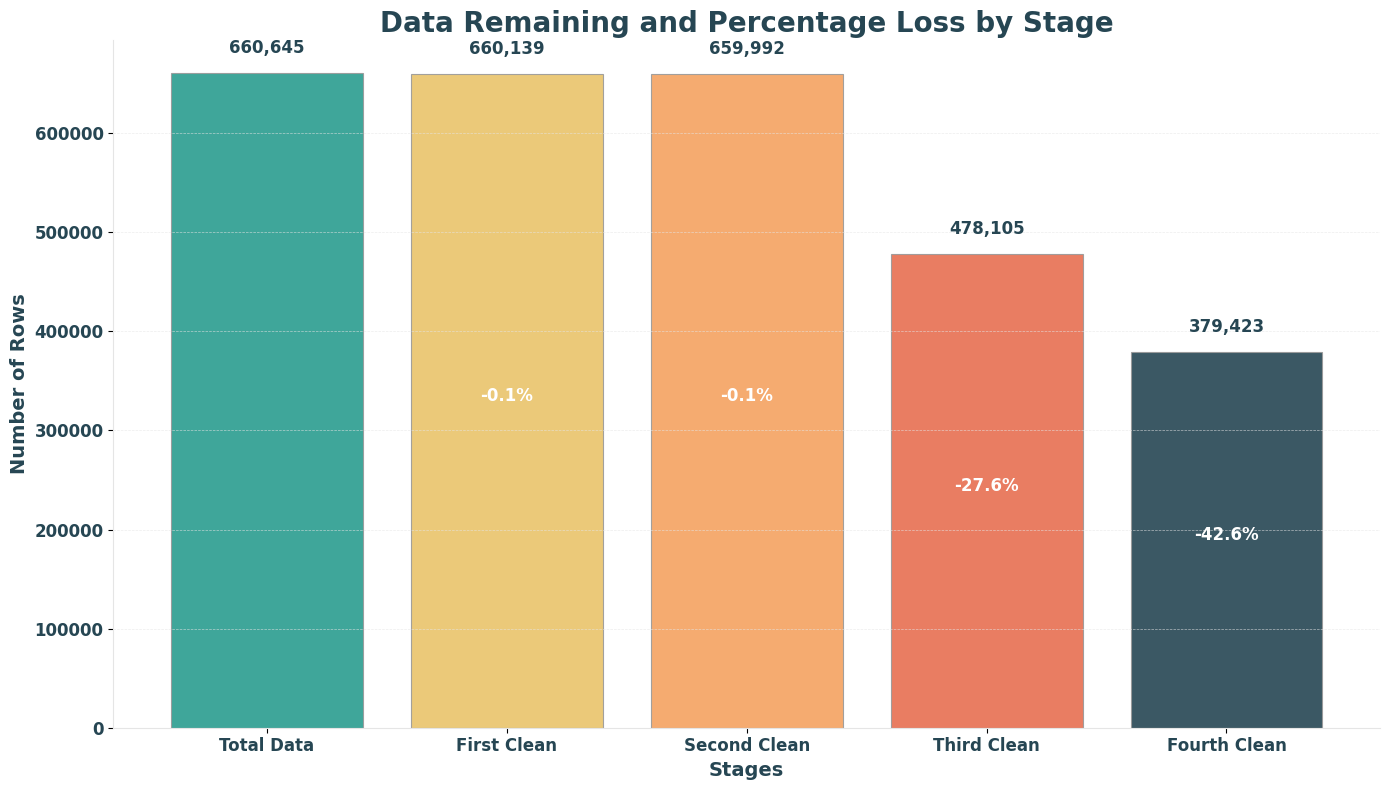

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your data
stages = ['Total Data', 'First Clean', 'Second Clean', 'Third Clean', 'Fourth Clean']
data_points = [totaldatashape, firstcleanshape, secondcleanshape, thirdcleanshape, fourthcleanshape]

# Calculate percentage loss
totaldatashape = data_points[0]
percentage_loss = [(totaldatashape - x) / totaldatashape * 100 for x in data_points]

# Define colors for a sleek, flat look
colors = ['#2A9D8F', '#E9C46A', '#F4A261', '#E76F51', '#264653']

# Create the figure
plt.figure(figsize=(14, 8))
bars = plt.bar(stages, data_points, color=colors, edgecolor='none', alpha=0.9)

# Add annotations for remaining data and percentage loss
for i, bar in enumerate(bars):
    height = bar.get_height()
    # Add remaining data on top of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 20000,
        f"{height:,}",
        ha='center',
        fontsize=12,
        color='#264653',
        weight='bold'
    )
    # Add percentage loss inside the bar (except Total Data)
    if i > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"-{percentage_loss[i]:.1f}%",
            ha='center',
            fontsize=12,
            color='white',
            weight='bold'
        )

# Add titles and labels with modern font styles
plt.title('Data Remaining and Percentage Loss by Stage', fontsize=20, weight='bold', color='#264653')
plt.xlabel('Stages', fontsize=14, weight='bold', color='#264653')
plt.ylabel('Number of Rows', fontsize=14, weight='bold', color='#264653')

# Remove unnecessary spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#E5E5E5')
plt.gca().spines['bottom'].set_color('#E5E5E5')

# Customize ticks
plt.xticks(fontsize=12, weight='bold', color='#264653')
plt.yticks(fontsize=12, weight='bold', color='#264653')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='#E5E5E5')

# Add a subtle shadow effect
for bar in bars:
    bar.set_linewidth(0.8)
    bar.set_edgecolor('#999999')

# Tight layout for balanced spacing
plt.tight_layout()

# Show the chart
plt.show()

In [ ]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1.515916e+18,tdicluNnRY
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1.515916e+18,aGFYrNgC08
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1.515916e+18,vnkdP81DDW
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1.515916e+18,kVBeYDPcBw
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1.515916e+18,F3VB9LYp39


In [ ]:
# Event Distribution
data['event_type'].value_counts()

,count
event_type,
view,338671
cart,24274
purchase,16478


In [ ]:
import seaborn as sns

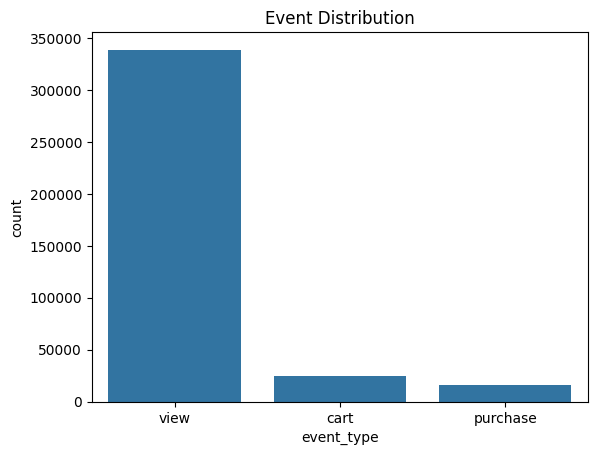

In [ ]:
# Plot Event Distribution
sns.countplot(x='event_type', data=data)
plt.title('Event Distribution')
plt.show()

In [ ]:
# Group data by 'event_type' and calculate total spending for each type
event_spending = data.groupby('event_type')['price'].count()

# Create labels and sizes for the pie chart
labels = event_spending.index
sizes = event_spending.values

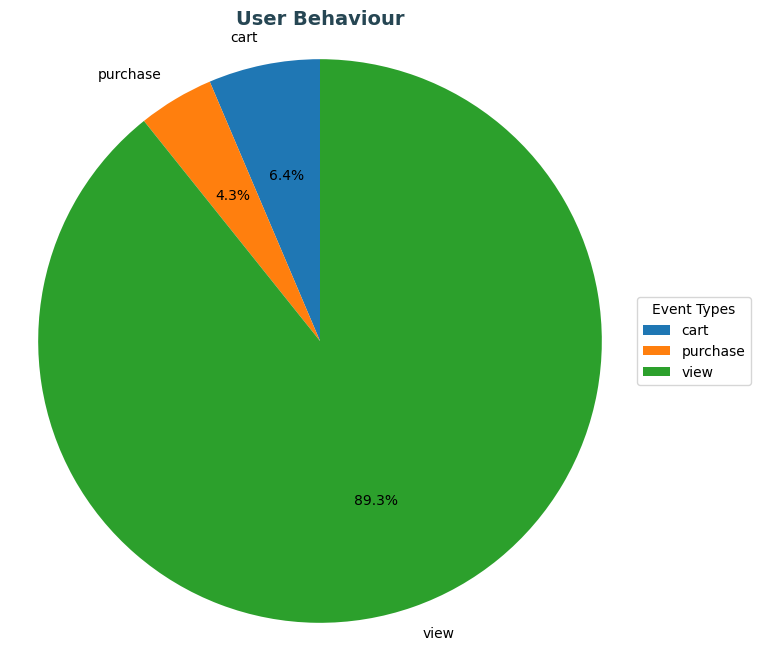

In [ ]:
# Create pie chart with percentage values displayed
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('User Behaviour', fontsize=14, weight='bold', color='#264653')

# Add legend to clarify labels
plt.legend(title='Event Types', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# brand popularly
data['brand'].value_counts().head()

,count
brand,
asus,18020
gigabyte,16579
amd,15238
samsung,14816
canon,13853


In [ ]:
# category popularity
data['category_code'].value_counts().head()

,count
category_code,
computers.components.videocards,55564
electronics.telephone,36270
computers.peripherals.printer,26255
stationery.cartrige,22307
computers.components.motherboard,19858


# **EDA User-level summaries**

In [ ]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1.515916e+18,tdicluNnRY
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1.515916e+18,aGFYrNgC08
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1.515916e+18,vnkdP81DDW
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1.515916e+18,kVBeYDPcBw
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1.515916e+18,F3VB9LYp39


In [ ]:
# total amount that user can see, add-to-cart or purchase
data.groupby('user_id')['price'].sum().sort_values(ascending=False).head(5)

,price
user_id,
1.515916e+18,166071.97
1.515916e+18,133101.53
1.515916e+18,108861.10
1.515916e+18,108697.18
1.515916e+18,86494.12


In [ ]:
# Average value of items user can see
data.groupby('user_id')['price'].mean().sort_values(ascending=False).head(5)

,price
user_id,
1.515916e+18,21606.006667
1.515916e+18,21340.860000
1.515916e+18,14253.540000
1.515916e+18,12989.460000
1.515916e+18,11036.300000


In [ ]:
# Number of purchases per user
data.groupby('user_id')['price'].count().sort_values(ascending=False).head(5)

,price
user_id,
1.515916e+18,427
1.515916e+18,340
1.515916e+18,329
1.515916e+18,191
1.515916e+18,181


In [ ]:
data[data['event_type'] == 'purchase']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
45,2020-09-24 12:04:10+00:00,purchase,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1.515916e+18,xn6SHCnZtk
82,2020-09-24 12:15:06+00:00,purchase,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1.515916e+18,2gngxS29Ts
150,2020-09-24 12:29:49+00:00,purchase,1283197,2144415973413749245,computers.peripherals.nas,zyxel,123.79,1.515916e+18,3jFpdbozOd
199,2020-09-24 12:43:21+00:00,purchase,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1.515916e+18,2gngxS29Ts
215,2020-09-24 12:48:11+00:00,purchase,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1.515916e+18,qkZG0pW1kp
...,...,...,...,...,...,...,...,...,...
660440,2021-01-22 14:11:00+00:00,purchase,1821497,2144415922427789416,computers.components.videocards,palit,384.48,1.515916e+18,ZY44VnApVB
660461,2021-01-22 14:14:56+00:00,purchase,3964980,2144415922427789416,computers.components.videocards,palit,609.60,1.515916e+18,JrbGQetRy2
660476,2021-01-22 14:19:40+00:00,purchase,3964980,2144415922427789416,computers.components.videocards,palit,609.60,1.515916e+18,mgnTcypL4e
660548,2021-01-22 14:34:43+00:00,purchase,4079420,2144415922427789416,computers.components.videocards,msi,449.51,1.515916e+18,imJSPLXP6d


In [ ]:
purchasecost=data.loc[data['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index().rename(columns={'price': 'total_spend'})

In [ ]:
purchasecost.head()

,user_id,total_spend
0,1.515916e+18,119.03
1,1.515916e+18,55.16
2,1.515916e+18,57.15
3,1.515916e+18,345.72
4,1.515916e+18,57.85


In [ ]:
purchasecost.sort_values('total_spend', ascending=False).head(5)

,user_id,total_spend
2236,1.515916e+18,9418.62
5270,1.515916e+18,8639.69
335,1.515916e+18,5489.08
527,1.515916e+18,4666.99
5500,1.515916e+18,4535.08


In [ ]:
# Convert event_time to datetime
try:
    data['event_time'] = pd.to_datetime(data['event_time'])
    print("event_time successfully converted to datetime format.")
except Exception as e:
    print(f"Error converting event_time: {e}")

# Check for negative prices
negative_prices = data[data['price'] < 0]
if not negative_prices.empty:
    print("Negative Prices Detected:")
    print(negative_prices)
else:
    print("No negative prices found.")
print("\n")

event_time successfully converted to datetime format.
No negative prices found.




In [ ]:
# Extract date and time components for analysis
data['date'] = data['event_time'].dt.date
data['hour'] = data['event_time'].dt.hour
data['day_of_week'] = data['event_time'].dt.day_name()
data['month'] = data['event_time'].dt.month_name()


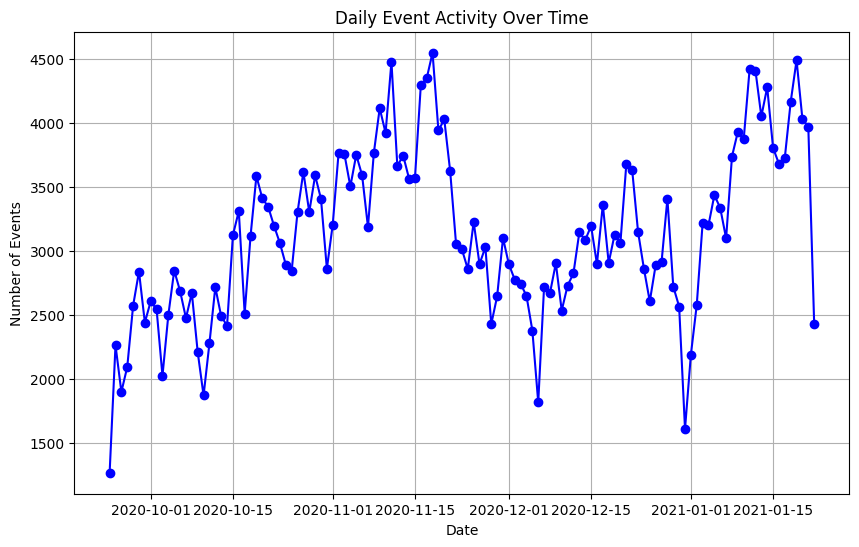

In [ ]:
# 2. Temporal Patterns: Daily Activity Over Time
daily_events = data.groupby('date')['event_type'].count()
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', color='blue')
plt.title("Daily Event Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.grid()
plt.show()



<ipython-input-65-825f28f2dd62>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_events.index, y=day_of_week_events.values, palette="coolwarm")


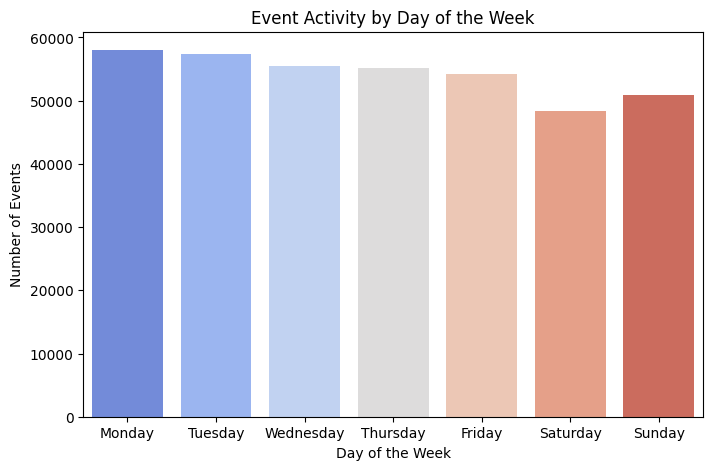

In [ ]:
# 3. Activity by Day of the Week
day_of_week_events = data.groupby('day_of_week')['event_type'].count()
day_of_week_events = day_of_week_events.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_events.index, y=day_of_week_events.values, palette="coolwarm")
plt.title("Event Activity by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Events")
plt.show()


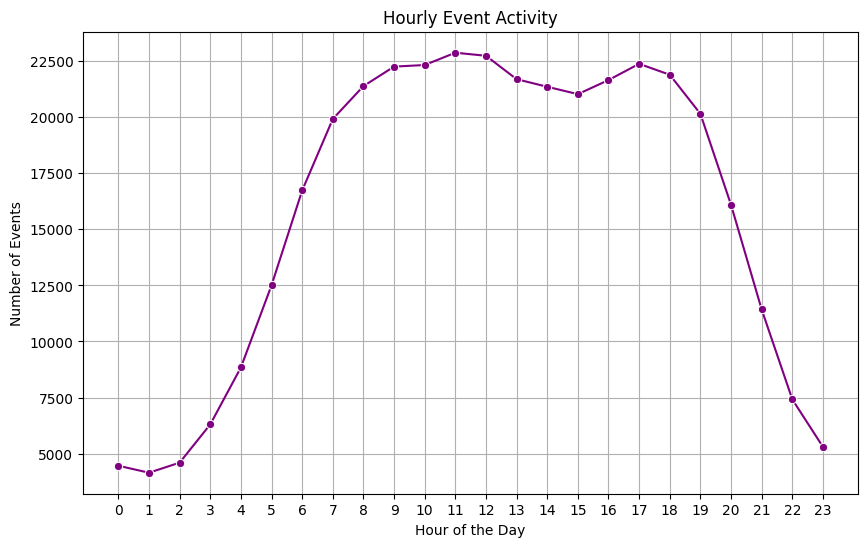

In [ ]:

# 4. Hourly Activity Patterns
hourly_events = data.groupby('hour')['event_type'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_events.index, y=hourly_events.values, marker='o', color='purple')
plt.title("Hourly Event Activity")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Events")
plt.grid()
plt.xticks(range(0, 24))
plt.show()



<ipython-input-76-e70b14b1d240>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_events = data.groupby('month')['event_type'].count()
<ipython-input-76-e70b14b1d240>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_events.index, y=monthly_events.values, palette="magma")


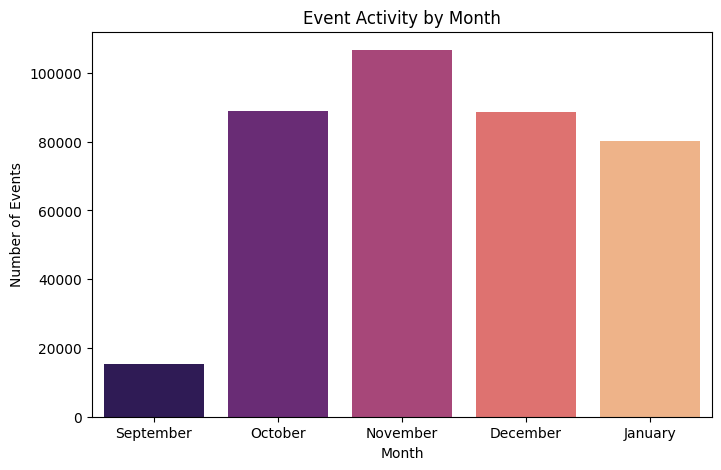

In [ ]:
# 5. Monthly Activity Patterns (Optional)
# Define the desired order of months
month_order = ["September", "October", "November", "December", "January"]

# Convert 'month' column to categorical with specified order
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

monthly_events = data.groupby('month')['event_type'].count()
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_events.index, y=monthly_events.values, palette="magma")
plt.title("Event Activity by Month")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.show()

<ipython-input-74-480402fdb83e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_events = data.groupby(['month', 'event_type'])['event_type'].count().reset_index(name='count')


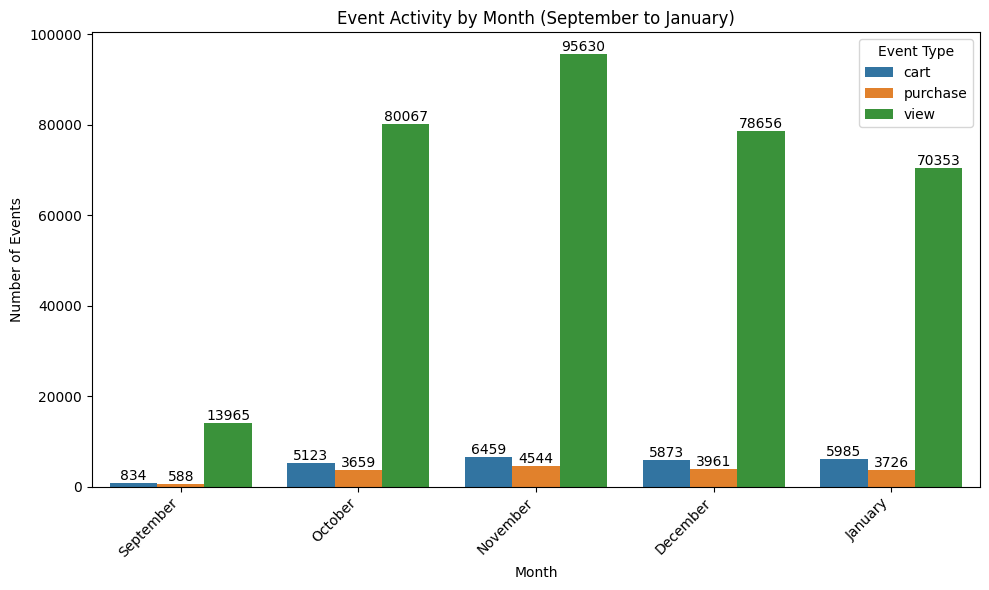

In [ ]:
# Define the desired order of months
month_order = ["September", "October", "November", "December", "January"]

# Convert 'month' column to categorical with specified order
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

# Group data by month and event type, then count occurrences
monthly_events = data.groupby(['month', 'event_type'])['event_type'].count().reset_index(name='count')

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='month', y='count', hue='event_type', data=monthly_events, order=month_order)
plt.title('Event Activity by Month (September to January)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event Type')

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')  # Format to integers

plt.tight_layout()
plt.show()

## User Behavior

<ipython-input-77-7d61a5a087d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users['user_id'], y=top_users['total_events'], palette='viridis')


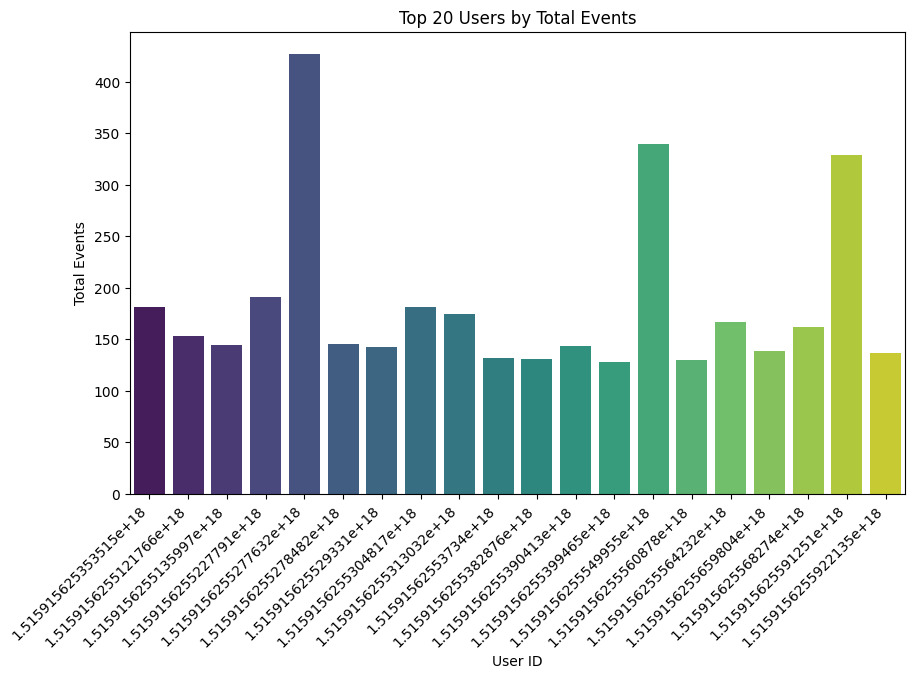

In [ ]:
# 1. Total Events Per User
user_event_counts = data.groupby('user_id')['event_type'].count().reset_index()
user_event_counts.rename(columns={'event_type': 'total_events'}, inplace=True)

# Plot Total Events Per User (Top 20 Users)
top_users = user_event_counts.sort_values('total_events', ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users['user_id'], y=top_users['total_events'], palette='viridis')
plt.title("Top 20 Users by Total Events")
plt.xlabel("User ID")
plt.ylabel("Total Events")
plt.xticks(rotation=45, ha='right')
plt.show()



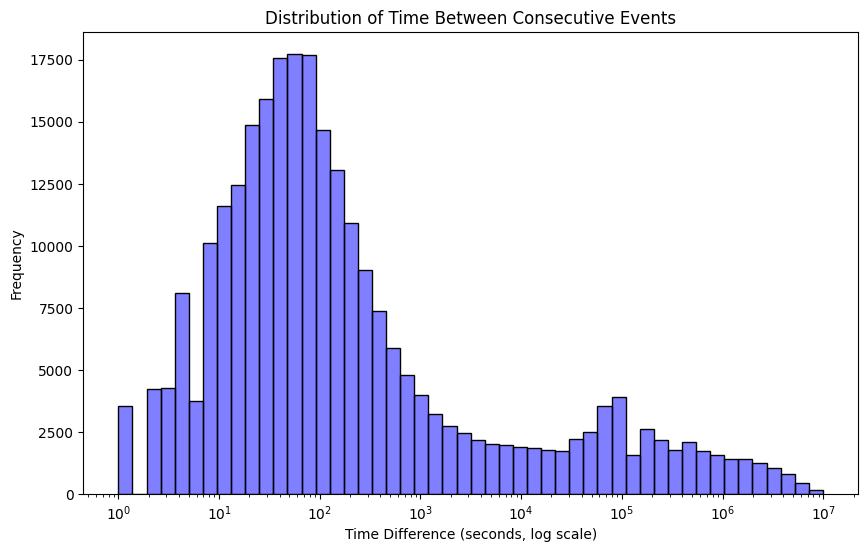

In [ ]:
# 2. Time Between Consecutive Events for Each User
# Sort data by user_id and event_time
data = data.sort_values(by=['user_id', 'event_time'])

# Calculate the time difference (in seconds) between consecutive events for each user
data['time_diff'] = data.groupby('user_id')['event_time'].diff().dt.total_seconds()

# Plot Distribution of Time Differences (Log Scale for better visibility)
plt.figure(figsize=(10, 6))
sns.histplot(data['time_diff'].dropna(), bins=50, kde=True, color='blue', log_scale=True)
plt.title("Distribution of Time Between Consecutive Events")
plt.xlabel("Time Difference (seconds, log scale)")
plt.ylabel("Frequency")
plt.show()



In [ ]:
# 3. Average Time Between Events per User
user_avg_time_diff = data.groupby('user_id')['time_diff'].mean().reset_index()
user_avg_time_diff.rename(columns={'time_diff': 'average_time_diff_seconds'}, inplace=True)

# Display the first few rows of the results
print("Total Events Per User:\n", user_event_counts.head())
print("\nAverage Time Between Events Per User:\n", user_avg_time_diff.head())

Total Events Per User:
         user_id  total_events
0  1.515916e+18             1
1  1.515916e+18            13
2  1.515916e+18             1
3  1.515916e+18            26
4  1.515916e+18            11

Average Time Between Events Per User:
         user_id  average_time_diff_seconds
0  1.515916e+18                        NaN
1  1.515916e+18                  238101.50
2  1.515916e+18                        NaN
3  1.515916e+18                  392836.56
4  1.515916e+18                  173996.80


## Category & Brand Popularity

<ipython-input-80-ad3c26b62dd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_views.head(10), x='view_count', y='category_code', palette='viridis')


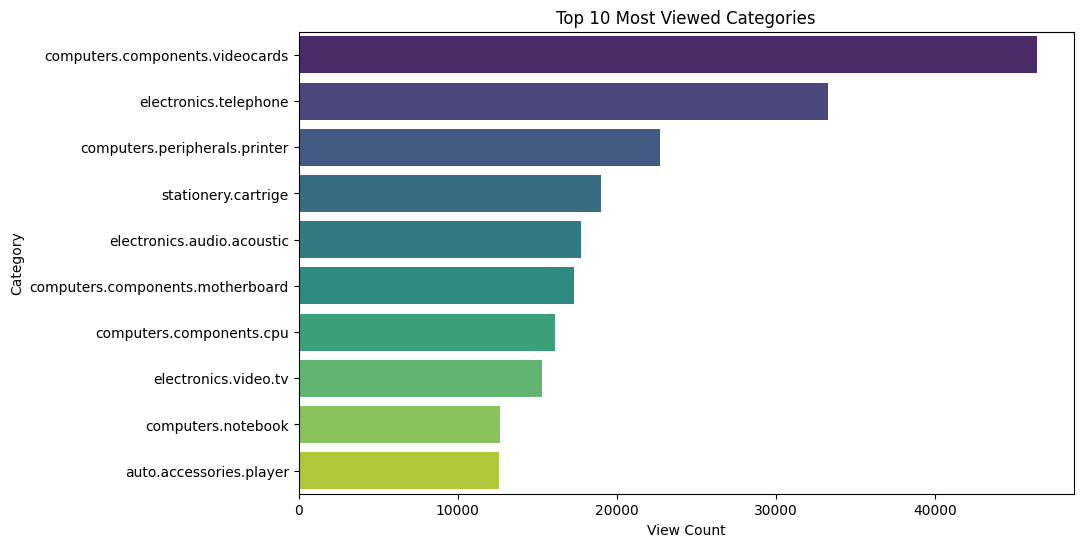

In [ ]:
# 1. Most Viewed Categories
category_views = data[data['event_type'] == 'view'].groupby('category_code').size().reset_index(name='view_count')
category_views = category_views.sort_values(by='view_count', ascending=False)

# Plot the top 10 most viewed categories
plt.figure(figsize=(10, 6))
sns.barplot(data=category_views.head(10), x='view_count', y='category_code', palette='viridis')
plt.title("Top 10 Most Viewed Categories")
plt.xlabel("View Count")
plt.ylabel("Category")
plt.show()



<ipython-input-81-b8d81c85d375>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_purchases.head(10), x='purchase_count', y='category_code', palette='plasma')


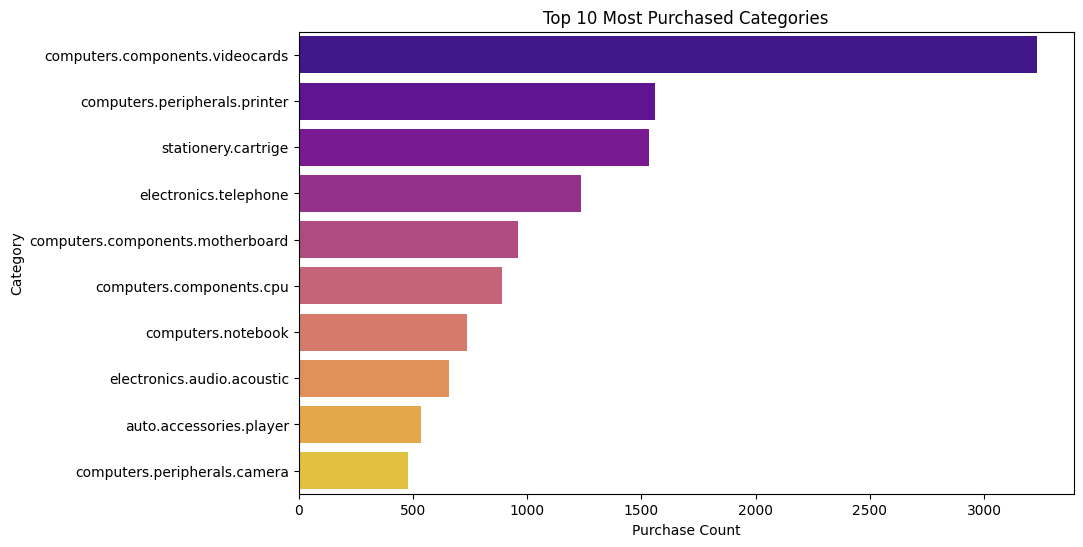

In [ ]:
# 2. Most Purchased Categories
category_purchases = data[data['event_type'] == 'purchase'].groupby('category_code').size().reset_index(name='purchase_count')
category_purchases = category_purchases.sort_values(by='purchase_count', ascending=False)

# Plot the top 10 most purchased categories
plt.figure(figsize=(10, 6))
sns.barplot(data=category_purchases.head(10), x='purchase_count', y='category_code', palette='plasma')
plt.title("Top 10 Most Purchased Categories")
plt.xlabel("Purchase Count")
plt.ylabel("Category")
plt.show()



<ipython-input-82-47c84a8619dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_views.head(10), x='view_count', y='brand', palette='magma')


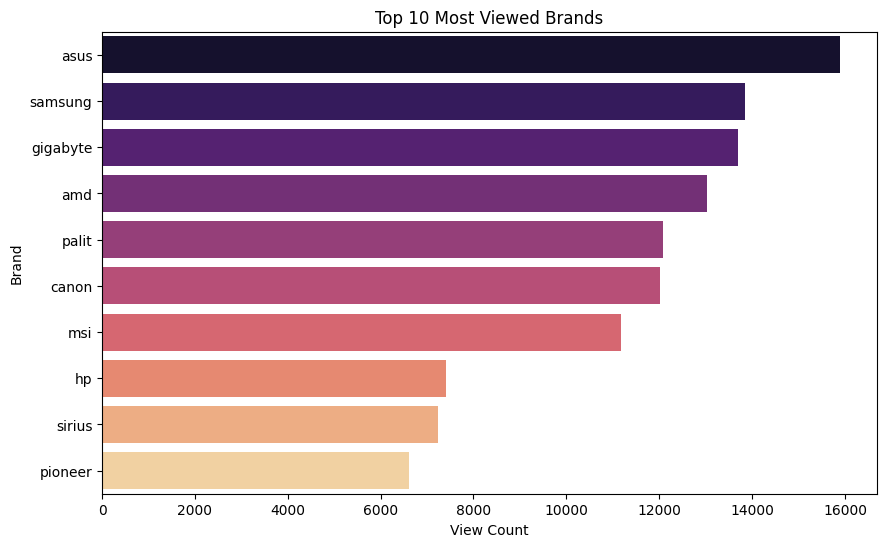

In [ ]:
# 3. Most Viewed Brands
brand_views = data[data['event_type'] == 'view'].groupby('brand').size().reset_index(name='view_count')
brand_views = brand_views.sort_values(by='view_count', ascending=False)

# Plot the top 10 most viewed brands
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_views.head(10), x='view_count', y='brand', palette='magma')
plt.title("Top 10 Most Viewed Brands")
plt.xlabel("View Count")
plt.ylabel("Brand")
plt.show()



<ipython-input-83-8ade7cb68074>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_category.head(10), x='price', y='category_code', palette='coolwarm')


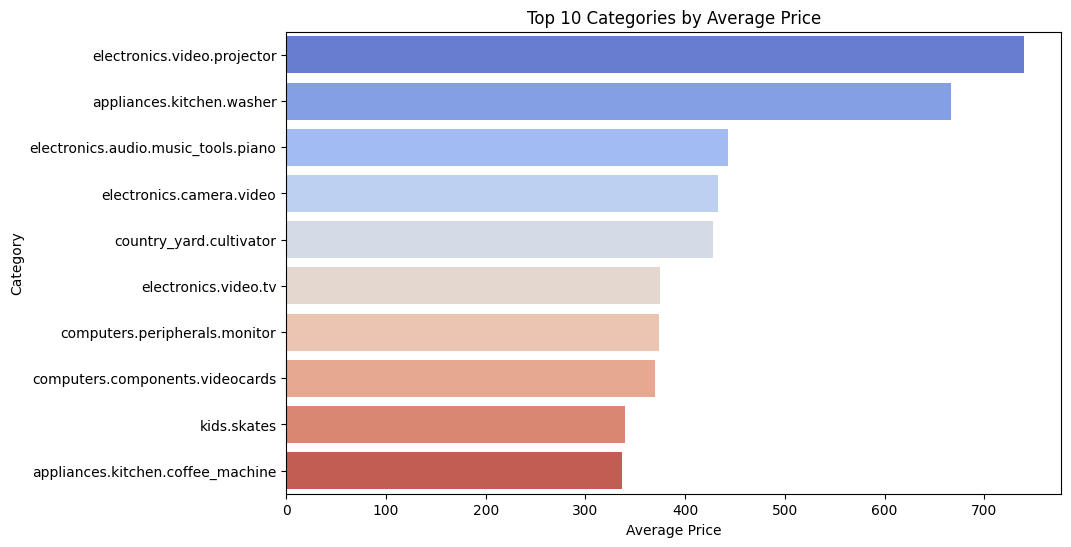

In [ ]:
# 4. Average Prices for Popular Categories
avg_price_category = data.groupby('category_code')['price'].mean().reset_index()
avg_price_category = avg_price_category.sort_values(by='price', ascending=False)

# Plot top 10 categories by average price
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_category.head(10), x='price', y='category_code', palette='coolwarm')
plt.title("Top 10 Categories by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Category")
plt.show()

# Define Churn

## Identify Churned Users

In [ ]:
# Filter purchase events
purchase_data = data[data['event_type'] == 'purchase']

# Calculate the last purchase date for each user
last_purchase = purchase_data.groupby('user_id')['event_time'].max().reset_index()
last_purchase.rename(columns={'event_time': 'last_purchase_date'}, inplace=True)

# Define churn period (e.g., 30 days)
churn_period = 30  # Adjust as needed

# Add a column to mark churned users
current_date = purchase_data['event_time'].max()  # Use the max event time as the current date
last_purchase['churned'] = (current_date - last_purchase['last_purchase_date']).dt.days > churn_period

# Separate churned and active users
churned_users = last_purchase[last_purchase['churned'] == True]
active_users = last_purchase[last_purchase['churned'] == False]

# Print summary
print("using last 30 day data")
print("Total Users:", last_purchase.shape[0])
print("Churned Users:", churned_users.shape[0])
print("Active Users:", active_users.shape[0])

using last 30 day data
Total Users: 9207
Churned Users: 6393
Active Users: 2814


In [ ]:
# Filter for only relevant event types for churn ('purchase')
purchase_data = data[data['event_type'] == 'purchase']

# Define a function to calculate days since the last purchase for each user
def calculate_days_since_last_purchase(data, churn_threshold=30):  # You can adjust the threshold as needed
    # Sort data by user_id and event_time
    data = data.sort_values(by=['user_id', 'event_time'])

    # Get the last purchase event per user
    last_purchase = data.groupby('user_id')['event_time'].max().reset_index()
    last_purchase.rename(columns={'event_time': 'last_purchase_time'}, inplace=True)

    # Merge the last purchase time back with the main dataset
    data = data.merge(last_purchase, on='user_id', how='left')

    # Calculate days since last purchase
    data['days_since_last_purchase'] = (data['event_time'].max() - data['last_purchase_time']).dt.days

    # Identify churned users
    data['is_churned'] = data['days_since_last_purchase'] > churn_threshold

    return data[['user_id', 'last_purchase_time', 'days_since_last_purchase', 'is_churned']].drop_duplicates()

# Apply the function to calculate churn status
churn_data = calculate_days_since_last_purchase(purchase_data)

# Handle edge cases
# Exclude users with only one event (new users)
event_counts = data.groupby('user_id')['event_time'].count().reset_index()
event_counts.rename(columns={'event_time': 'event_count'}, inplace=True)

churn_data = churn_data.merge(event_counts, on='user_id', how='left')
churn_data = churn_data[churn_data['event_count'] > 1]
churn_data

,user_id,last_purchase_time,days_since_last_purchase,is_churned,event_count
0,1.515916e+18,2020-10-03 11:23:44+00:00,111,True,11
1,1.515916e+18,2020-09-29 05:52:55+00:00,115,True,3
2,1.515916e+18,2020-10-06 10:29:25+00:00,108,True,10
3,1.515916e+18,2020-11-25 09:24:42+00:00,58,True,10
4,1.515916e+18,2020-10-15 05:09:35+00:00,99,True,40
...,...,...,...,...,...
9202,1.515916e+18,2021-01-22 13:25:50+00:00,0,False,4
9203,1.515916e+18,2021-01-22 13:26:43+00:00,0,False,12
9204,1.515916e+18,2021-01-22 14:11:00+00:00,0,False,4
9205,1.515916e+18,2021-01-22 14:42:10+00:00,0,False,5


# Feature Engineering

In [ ]:
# Create Recency, Frequency, and Monetary (RFM) Features
recency_data = data.groupby('user_id')['event_time'].max().reset_index()
recency_data['recency'] = (data['event_time'].max() - recency_data['event_time']).dt.days

frequency_data = data.groupby('user_id')['user_session'].nunique().reset_index()
frequency_data.rename(columns={'user_session': 'frequency'}, inplace=True)

monetary_data = data[data['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index()
monetary_data.rename(columns={'price': 'monetary_value'}, inplace=True)

In [ ]:
# Merge RFM features
rfm_data = recency_data.merge(frequency_data, on='user_id', how='left')
rfm_data = rfm_data.merge(monetary_data, on='user_id', how='left')
rfm_data.fillna({'monetary_value': 0}, inplace=True)